In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163492 sha256=a879362f47cc14fcffb4794297b94b397380db2da20ed9ecc0f7629c8107d858
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import csv
df_capstone = pd.read_csv('capstone_reviews.csv')
df_capstone.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
df_capstone.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,4341.000000,4196.000000,4194.000000,4108.000000,3941.000000,3095.000000,4239.000000
mean,6.103432,3.514299,3.558655,3.553311,3.754631,3.156381,3.496579
std,3.213471,1.300421,1.463123,1.347140,1.266688,1.570608,1.447826
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000
50%,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_capstone.shape

(4356, 17)

In [ ]:
import re
def split_route_text(route_text):
  route_text = str(route_text)
  if route_text == 'nan':
    return []
  split_words = [' to', ' via']
  pattern = '|'.join(map(re.escape, split_words))
  result = re.split(pattern, route_text)
  #result = route_text.split()

  # Removing any leading/trailing whitespace from each element and filtering out empty strings
  result = [item.strip() for item in result if item.strip()]

  return(result)

In [ ]:
def return_from_to(route_text):
  destinations = split_route_text(route_text)
  if len(destinations)>=2:
    return pd.Series([destinations[0], destinations[1]], index=['from', 'to'])
  elif len(destinations) == 1:
    return pd.Series([destinations[0], np.nan], index=['from', 'to'])
  else:
    return pd.Series([np.nan, np.nan], index=['from', 'to'])

In [ ]:
df_capstone[['from', 'to']] = df_capstone.apply(lambda row: return_from_to(row['route']), axis=1)

In [ ]:
df_capstone = df_capstone.dropna(subset = ['airline','overall', 'author'])
df_capstone.head(5)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,from,to
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes,London,Izmir
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no,Istanbul,Bucharest
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no,Rome,Prishtina
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,Washington Dulles,Karachi
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no,Mumbai,Dublin


In [ ]:
df_capstone.shape

(4341, 19)

In [ ]:
unique_author_airline =df_capstone.groupby(['author', 'airline']).size().reset_index(name='count')
unique_author_airline.shape

(3710, 3)

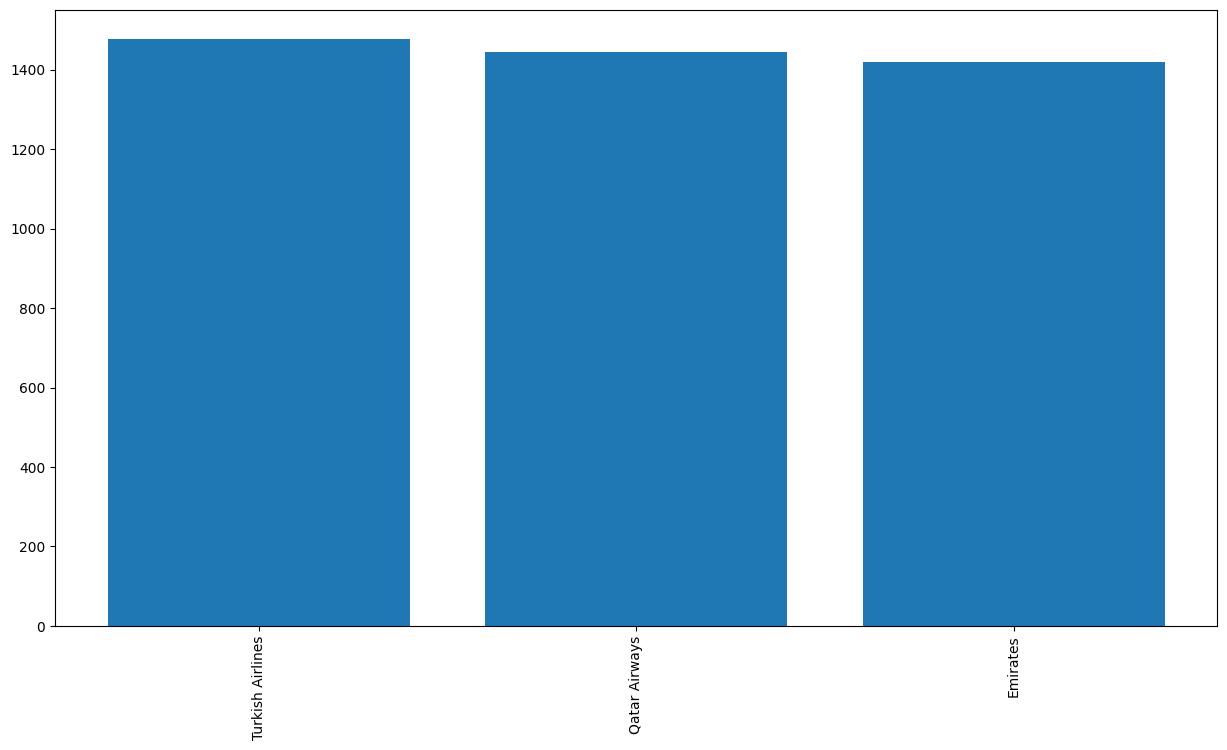

In [ ]:
import matplotlib.pyplot as plt

# Plot from https://www.kaggle.com/code/balaji89/skytrax-passenger-referral-prediction

plt.figure(figsize=(15,8))
plt.bar(x = df_capstone.airline.value_counts().index,height=df_capstone.airline.value_counts().values)
plt.xticks(rotation = 90)

plt.show()

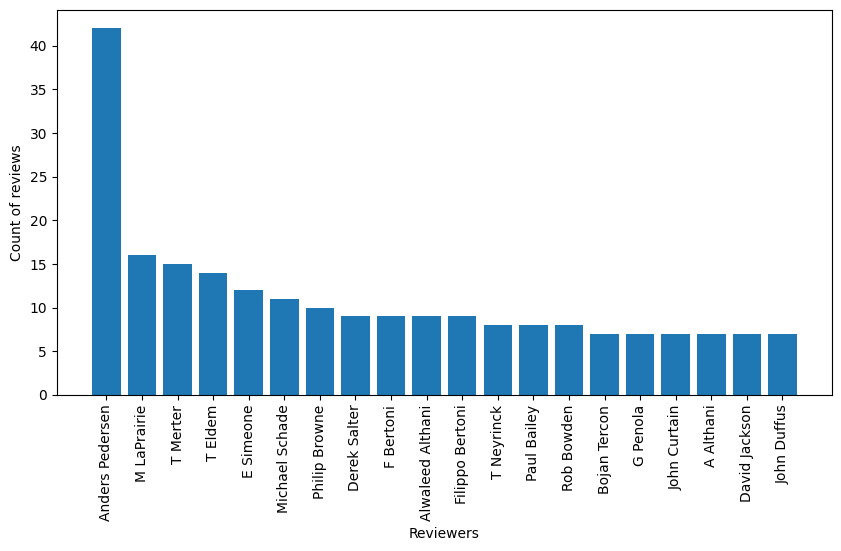

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = df_capstone.author.value_counts().sort_values(ascending=False)[:20].index,height=df_capstone.author.value_counts().sort_values(ascending=False)[:20].values)
plt.xticks(rotation = 90)
plt.ylabel("Count of reviews")
plt.xlabel("Reviewers")

plt.show()

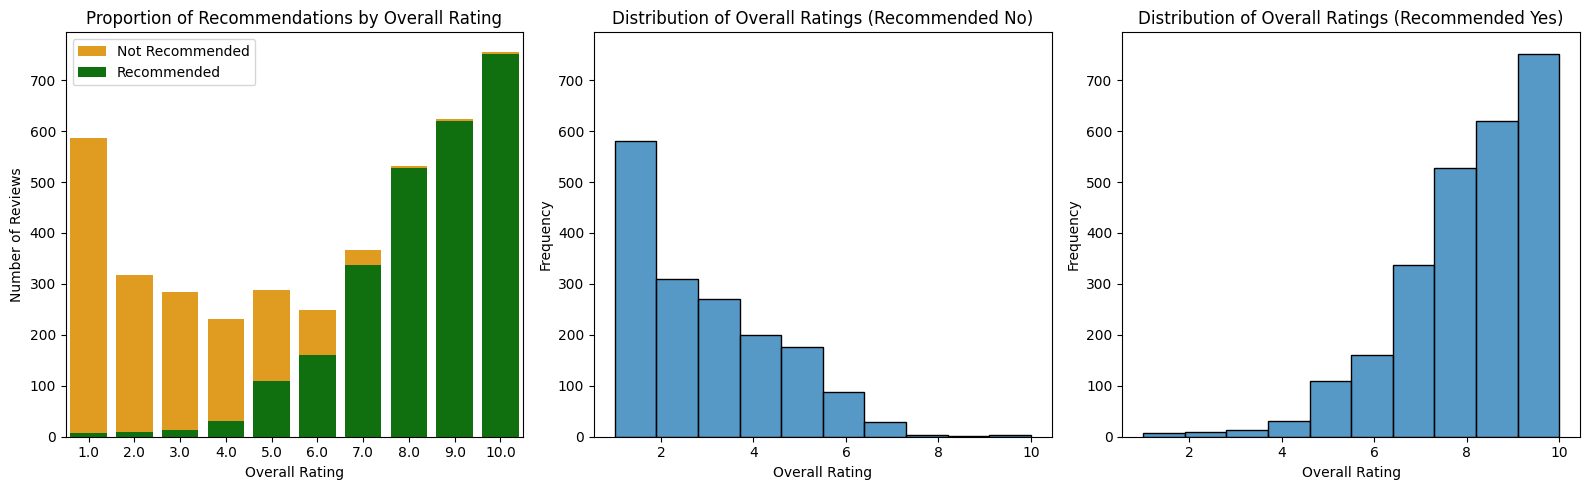

In [ ]:
import seaborn as sns
# Filter the dataset by 'recommended' == 'Yes'
recommended_yes = df_capstone[df_capstone['recommended'] == 'yes']

# Filter the dataset by 'recommended' == 'No'
recommended_no = df_capstone[df_capstone['recommended'] == 'no']

# Create the plots
plt.figure(figsize=(16, 5))

recommendation_counts = df_capstone.groupby(['overall', 'recommended']).size().unstack(fill_value=0)

# Plot 1: Distribution of 'overall'
recommendation_counts['yes_proportion'] = recommendation_counts['yes'] / (recommendation_counts['yes'] + recommendation_counts['no'])

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot

sns.barplot(x=recommendation_counts.index, y=recommendation_counts.sum(axis=1), color='orange', label='Not Recommended')

# Overlay the 'yes' counts on top using the calculated proportions
sns.barplot(x=recommendation_counts.index, y=recommendation_counts['yes'], color='green', label='Recommended')

plt.title('Proportion of Recommendations by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.legend()

# Get the scale of the y-axis
y_max = plt.gca().get_ylim()[1]

# Plot 2: Distribution of 'overall' where 'recommended' == 'no'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 3rd subplot
sns.histplot(recommended_no['overall'], kde=False, bins=10)
plt.title('Distribution of Overall Ratings (Recommended No)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.ylim(0, y_max)  # Fix the y-axis limit

# Plot 3: Distribution of 'overall' where 'recommended' == 'yes'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 2nd subplot
sns.histplot(recommended_yes['overall'], kde=False, bins=10)
plt.title('Distribution of Overall Ratings (Recommended Yes)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.ylim(0, y_max)  # Fix the y-axis limit


# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
print(f'Percentage of recommended reviews: {len(recommended_yes)/(len(recommended_no)+len(recommended_yes))}')

Percentage of recommended reviews: 0.607759640406908


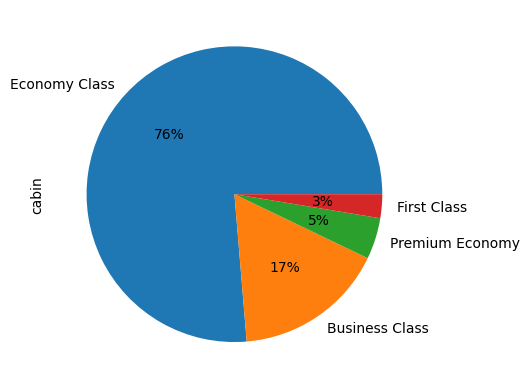

In [ ]:
df_capstone['cabin'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

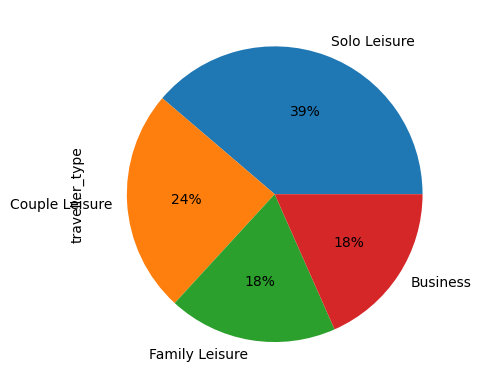

In [ ]:
df_capstone['traveller_type'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

<Figure size 1200x800 with 0 Axes>

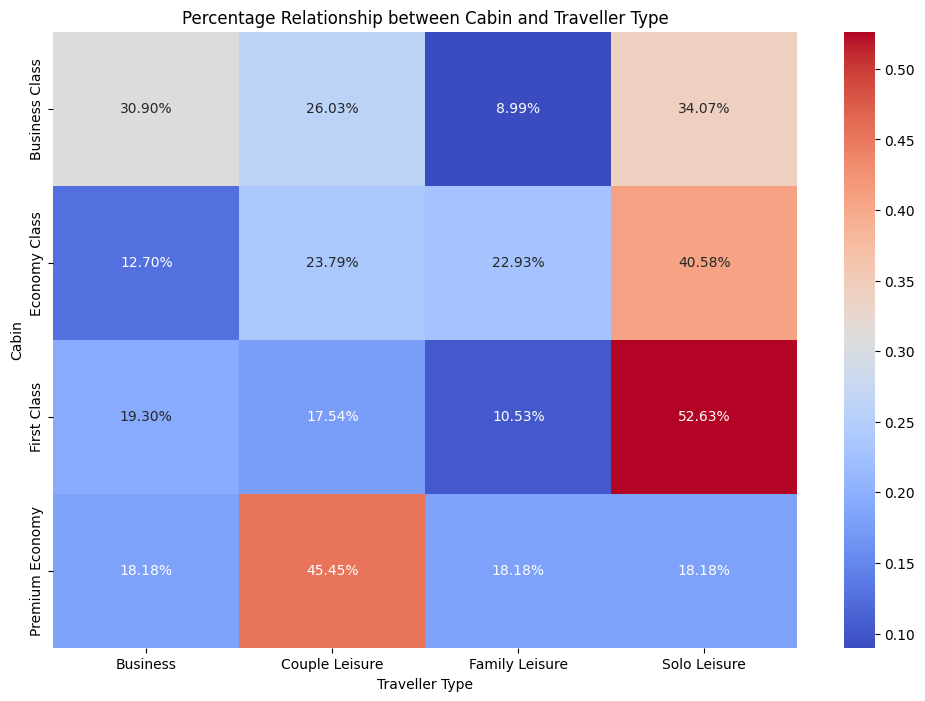

In [ ]:
cabin_traveller_ct = pd.crosstab(df_capstone['cabin'], df_capstone['traveller_type'])

# Normalize the crosstab to get percentages
cabin_traveller_pct = cabin_traveller_ct.div(cabin_traveller_ct.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))  # You may need to adjust the size depending on your dataset

# Draw the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Draw the heatmap
sns.heatmap(cabin_traveller_pct, annot=True, fmt=".2%", cmap='coolwarm')

# Add labels and a title if desired
plt.title('Percentage Relationship between Cabin and Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Cabin')

# Show the plot
plt.show()

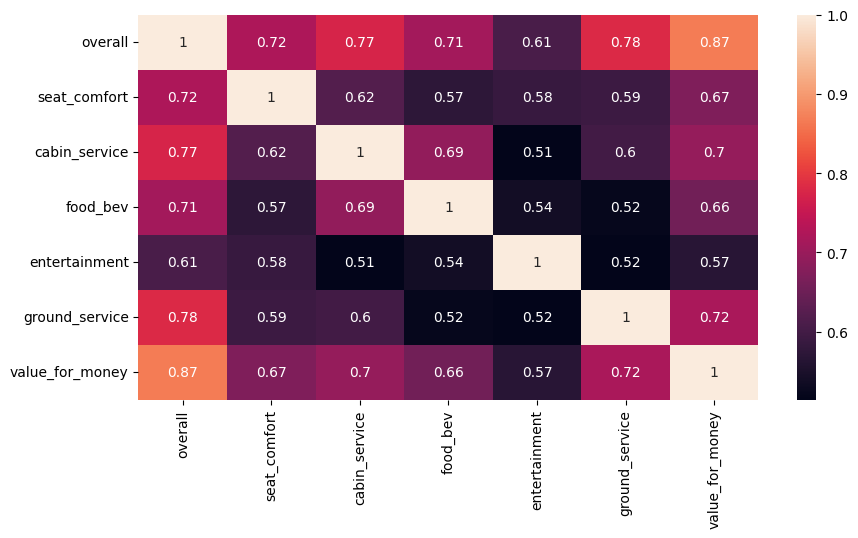

In [ ]:
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df_capstone.select_dtypes(include = np.number).corr(),annot=True)
plt.show()

In [ ]:
total_possible_interactions = df_capstone['author'].nunique() * df_capstone['airline'].nunique()

# Count the actual number of ratings present
actual_ratings = df_capstone.shape[0]

# Calculate the number of missing ratings
missing_ratings = total_possible_interactions - actual_ratings

# Calculate the sparsity of the dataset matrix
sparsity = (missing_ratings / total_possible_interactions) * 100
print(sparsity)

59.70481759955444


In [ ]:
# Prune the dataframe so that only authors with more than 8 reviews are kept in the dataset
mask = df_capstone.groupby('author')['author'].transform('size') >= 8
filter_df = df_capstone[mask]

In [ ]:
filter_df.shape

(180, 19)

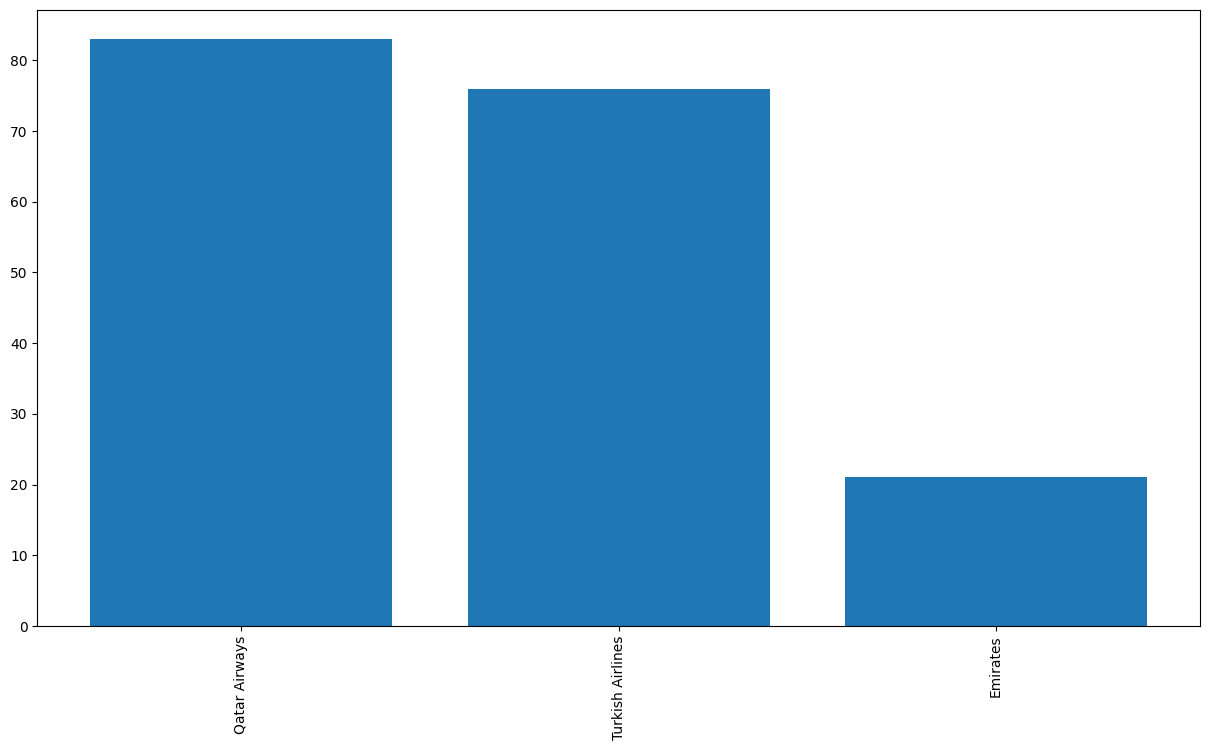

In [ ]:
plt.figure(figsize=(15,8))
plt.bar(x = filter_df.airline.value_counts().index,height=filter_df.airline.value_counts().values)
plt.xticks(rotation = 90)

plt.show()

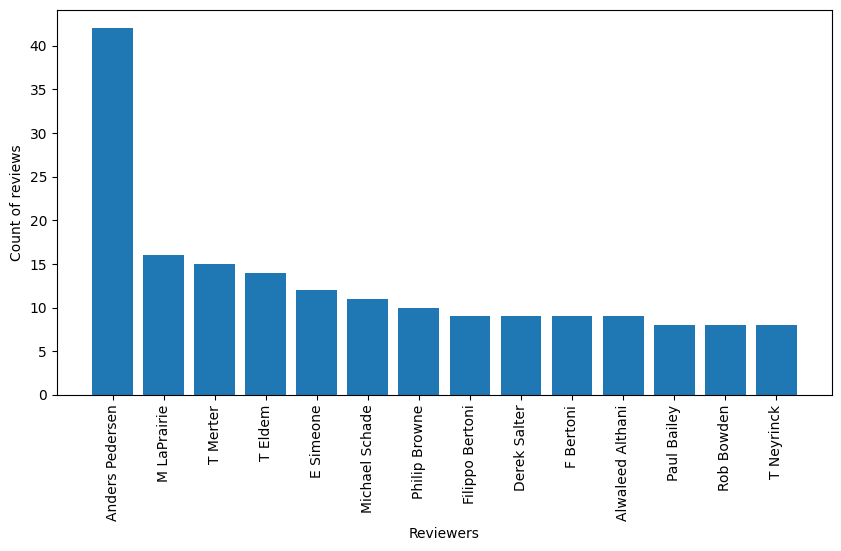

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(x = filter_df.author.value_counts().sort_values(ascending=False)[:20].index,height=filter_df.author.value_counts().sort_values(ascending=False)[:20].values)
plt.xticks(rotation = 90)
plt.ylabel("Count of reviews")
plt.xlabel("Reviewers")

plt.show()

In [ ]:
filter_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,180.000000,174.000000,174.000000,174.000000,170.000000,123.000000,175.000000
mean,7.844444,4.126437,4.275862,3.775862,3.917647,3.853659,4.211429
std,1.908002,0.916195,1.005070,1.193089,1.122252,1.198927,1.009088
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,4.000000,4.000000,3.000000,3.250000,3.000000,4.000000
50%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000
75%,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


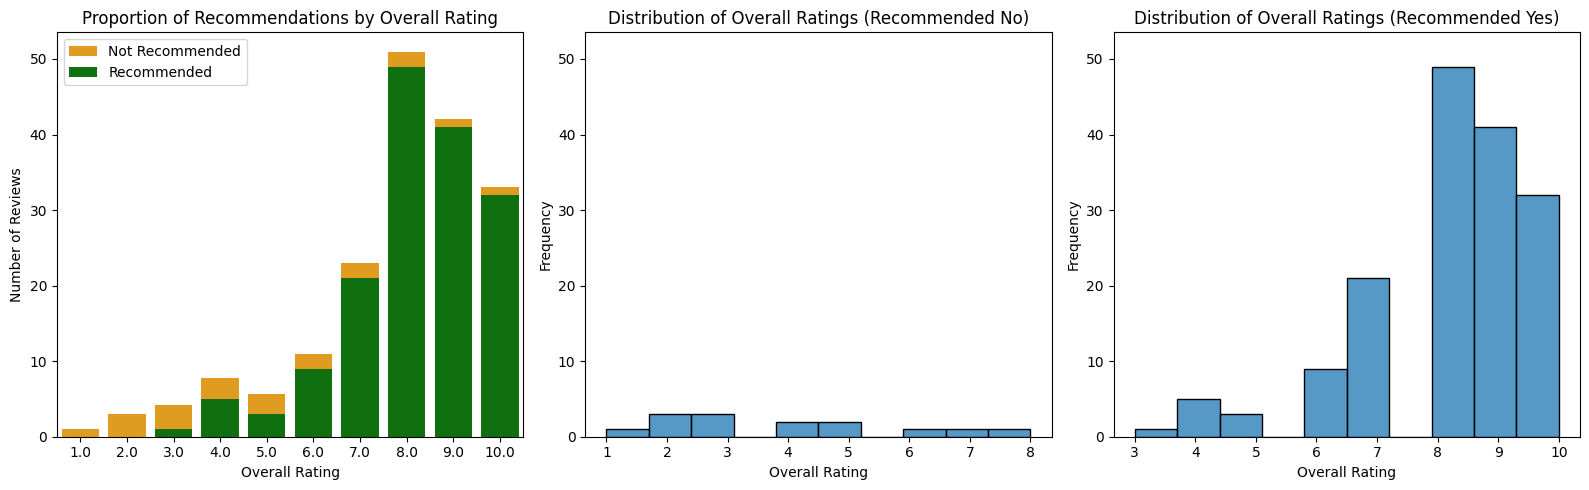

In [ ]:
recommended_yes = filter_df[filter_df['recommended'] == 'yes']

# Filter the dataset by 'recommended' == 'No'
recommended_no = filter_df[filter_df['recommended'] == 'no']

# Create the plots
plt.figure(figsize=(16, 5))

recommendation_counts = filter_df.groupby(['overall', 'recommended']).size().unstack(fill_value=0)

# Plot 1: Distribution of 'overall'
recommendation_counts['yes_proportion'] = recommendation_counts['yes'] / (recommendation_counts['yes'] + recommendation_counts['no'])

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot

sns.barplot(x=recommendation_counts.index, y=recommendation_counts.sum(axis=1), color='orange', label='Not Recommended')

# Overlay the 'yes' counts on top using the calculated proportions
sns.barplot(x=recommendation_counts.index, y=recommendation_counts['yes'], color='green', label='Recommended')

plt.title('Proportion of Recommendations by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.legend()

# Get the scale of the y-axis
y_max = plt.gca().get_ylim()[1]

# Plot 2: Distribution of 'overall' where 'recommended' == 'no'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 3rd subplot
sns.histplot(recommended_no['overall'], kde=False, bins=10)
plt.title('Distribution of Overall Ratings (Recommended No)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.ylim(0, y_max)  # Fix the y-axis limit

# Plot 3: Distribution of 'overall' where 'recommended' == 'yes'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 2nd subplot
sns.histplot(recommended_yes['overall'], kde=False, bins=10)
plt.title('Distribution of Overall Ratings (Recommended Yes)')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.ylim(0, y_max)  # Fix the y-axis limit


# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
print(f'Percentage of recommended reviews: {len(recommended_yes)/(len(recommended_no)+len(recommended_yes))}')

Percentage of recommended reviews: 0.92


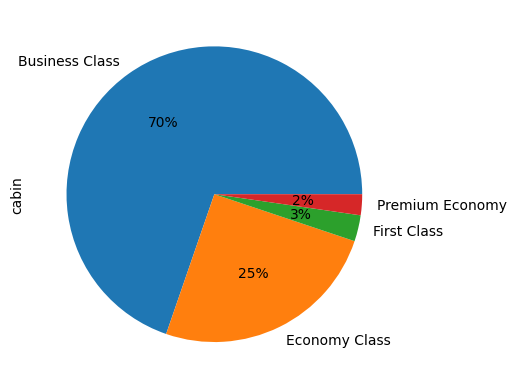

In [ ]:
filter_df['cabin'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

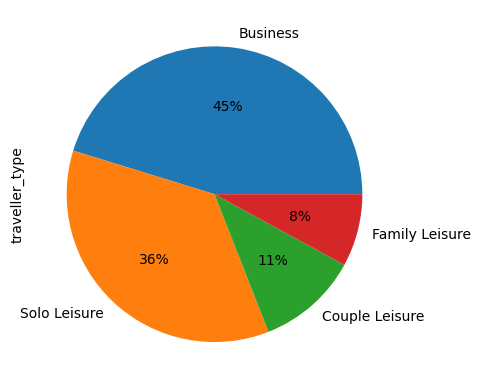

In [ ]:
filter_df['traveller_type'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

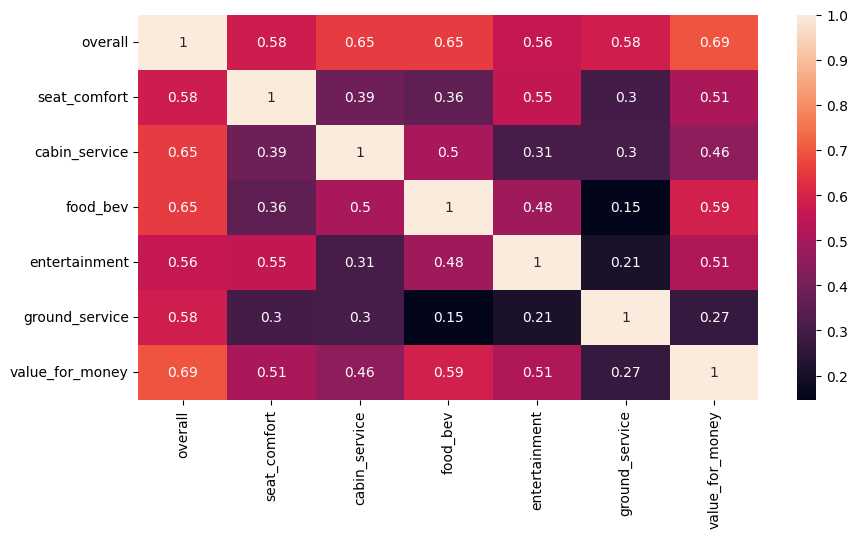

In [ ]:
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(filter_df.select_dtypes(include = np.number).corr(),annot=True)
plt.show()

<Figure size 1200x800 with 0 Axes>

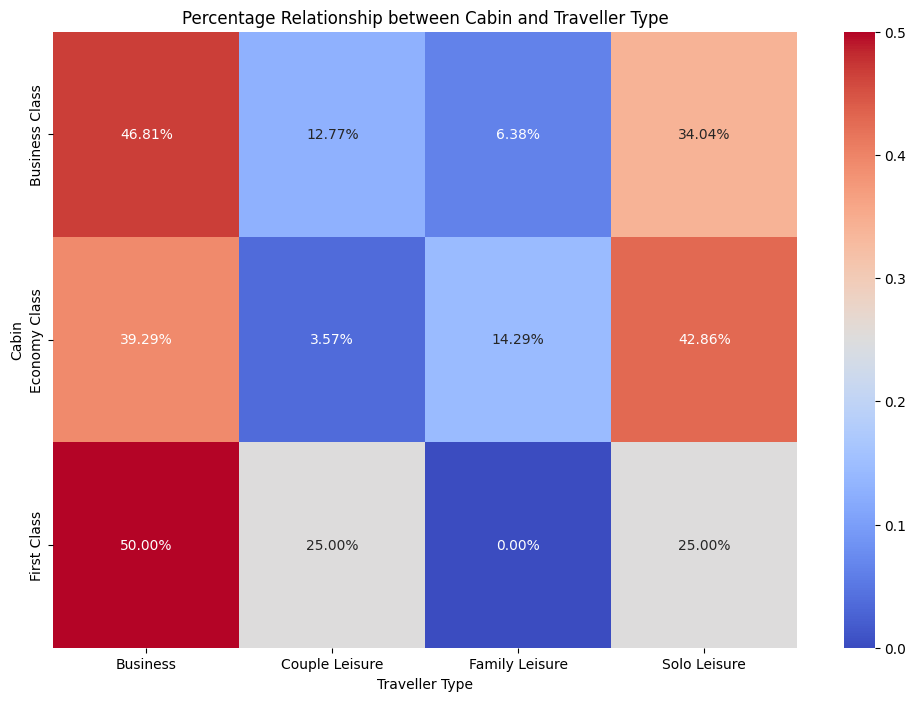

In [ ]:
cabin_traveller_ct = pd.crosstab(filter_df['cabin'], filter_df['traveller_type'])

# Normalize the crosstab to get percentages
cabin_traveller_pct = cabin_traveller_ct.div(cabin_traveller_ct.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))  # You may need to adjust the size depending on your dataset

# Draw the heatmap
plt.figure(figsize=(12, 8))  # Adjust the size as needed

# Draw the heatmap
sns.heatmap(cabin_traveller_pct, annot=True, fmt=".2%", cmap='coolwarm')

# Add labels and a title if desired
plt.title('Percentage Relationship between Cabin and Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Cabin')

# Show the plot
plt.show()

In [ ]:
total_possible_interactions = filter_df['author'].nunique() * filter_df['airline'].nunique()

# Count the actual number of ratings present
actual_ratings = filter_df.shape[0]

# Calculate the number of missing ratings
missing_ratings = total_possible_interactions - actual_ratings

# Calculate the sparsity of the dataset matrix
sparsity = (missing_ratings / total_possible_interactions) * 100
print(sparsity)

-328.57142857142856


In [ ]:
r_matrix_test = filter_df.pivot_table(values='overall', index='author', columns='airline', aggfunc='mean')
r_matrix_test.head()

airline,Emirates,Qatar Airways,Turkish Airlines
author,,,
Alwaleed Althani,NaN,8.111111,NaN
Anders Pedersen,NaN,8.289474,6.500000
Derek Salter,7.0,9.666667,9.200000
E Simeone,6.0,5.000000,6.333333
F Bertoni,NaN,10.000000,9.125000


In [ ]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = filter_df.copy()
y = filter_df['author']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

## Stratified random sampling: is a method to ensure that each sample it's likely to occur in after the split.
## random_state:

In [ ]:
# Build the ratings matrix using pivot_table function
# If an author has multiple ratings on one airline, the value is the mean of all the
# reviews for that airline given by the author
r_matrix = X_train.pivot_table(values='overall', index='airline', columns='author', aggfunc='mean')

r_matrix.head()

author,Alwaleed Althani,Anders Pedersen,Derek Salter,E Simeone,F Bertoni,Filippo Bertoni,M LaPrairie,Michael Schade,Paul Bailey,Philip Browne,Rob Bowden,T Eldem,T Merter,T Neyrinck
airline,,,,,,,,,,,,,,
Emirates,NaN,NaN,7.0,6.000000,NaN,NaN,NaN,NaN,NaN,7.0,9.0,NaN,NaN,8.0
Qatar Airways,7.857143,8.2,9.5,5.000000,NaN,10.000000,7.555556,7.875,NaN,9.0,9.5,NaN,NaN,9.0
Turkish Airlines,NaN,5.5,9.0,5.833333,9.142857,8.666667,4.666667,NaN,9.666667,7.5,NaN,5.8,8.909091,NaN


In [ ]:
r_matrix.shape

(3, 14)

In [ ]:
def cf_user_mean(author, airline):

    # Check if airline exists in r_matrix
    if author in r_matrix:
        # Compute the mean of all the ratings given by the author
        mean_rating = r_matrix[author].mean()
    else:
        # Default to a rating of 6.9 in the absence of any information (Mean of overall)
        mean_rating = 6.9

    return mean_rating

In [ ]:
from sklearn.metrics import mean_squared_error

#Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
def score(cf_model):

    #Construct a list of user-movie tuples from the testing dataset
    author_pairs = zip(X_test['author'], X_test['airline'])

    #Predict the rating for every user-movie tuple
    y_pred = np.array([cf_model(author, airline) for (author, airline) in author_pairs])


    #Extract the actual ratings given by the users in the test data
    y_true = np.array(X_test['overall'])

    #Return the final RMSE score
    return rmse(y_true, y_pred)

In [ ]:
def baseline(author, airline):
    return 6.9

In [ ]:
score(baseline)

2.427847697950686

In [ ]:
score(cf_user_mean)

2.2437580836111506

In [ ]:
authors = filter_df['author'].unique()
airlines = filter_df['airline'].unique()

id_authors = {author: id for id, author in enumerate(authors)}
id_airlines = {airline: id for id, airline in enumerate(airlines)}

id_to_authors = {id: author for author, id in id_authors.items()}
id_to_airlines = {id: airline for airline, id in id_airlines.items()}


In [ ]:
ratings = filter_df[['airline', 'overall', 'author']]


In [ ]:
ratings.head()

,airline,overall,author
123,Turkish Airlines,8.0,T Merter
127,Turkish Airlines,3.0,T Eldem
128,Turkish Airlines,3.0,T Eldem
146,Turkish Airlines,7.0,T Merter
172,Turkish Airlines,9.0,Philip Browne


In [ ]:
# Group by airline and author, replace overall with mean of duplicate author-airplane pairs
ratings_mean = ratings.groupby(['airline', 'author'], as_index = False).mean()
ratings_mean.head()

,airline,author,overall
0,Emirates,Derek Salter,7.0
1,Emirates,E Simeone,6.0
2,Emirates,M LaPrairie,2.0
3,Emirates,Philip Browne,7.0
4,Emirates,Rob Bowden,9.0


In [ ]:
ratings_id = ratings_mean.copy()
ratings_id['airline'] = ratings_mean['airline'].map(id_airlines)
ratings_id['author'] = ratings_mean['author'].map(id_authors)

In [ ]:
ratings_id.head()

,airline,author,overall
0,2,8,7.0
1,2,7,6.0
2,2,4,2.0
3,2,2,7.0
4,2,12,9.0


In [ ]:
len(ratings_id['author'].unique())

14

In [ ]:
#Import the required classes and methods from the surprise library
from surprise import *
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate
import time
import datetime



Some of the code under is from the documentation of surprise: https://surprise.readthedocs.io/en/stable/FAQ.html

In [ ]:


from collections import defaultdict

def get_top_n(predictions, n=10, ):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Top N items for all the users using SVD algorithm for finding similar users

In [ ]:
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader()

data = Dataset.load_from_df(ratings_id[['author', 'airline', 'overall']], reader)
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=5)

# Print the recommended items for each user
for uid, airlines_id in top_n.items():
    print(id_to_authors[uid], [id_to_airlines[iid] for (iid, _) in airlines_id])

Derek Salter ['Emirates', 'Qatar Airways', 'Turkish Airlines']
E Simeone ['Emirates', 'Qatar Airways', 'Turkish Airlines']
M LaPrairie ['Emirates', 'Qatar Airways', 'Turkish Airlines']
Philip Browne ['Emirates', 'Qatar Airways', 'Turkish Airlines']
Rob Bowden ['Emirates', 'Qatar Airways']
T Neyrinck ['Emirates', 'Qatar Airways']
Alwaleed Althani ['Qatar Airways']
Anders Pedersen ['Qatar Airways', 'Turkish Airlines']
F Bertoni ['Qatar Airways', 'Turkish Airlines']
Filippo Bertoni ['Qatar Airways', 'Turkish Airlines']
Michael Schade ['Qatar Airways']
T Eldem ['Qatar Airways', 'Turkish Airlines']
Paul Bailey ['Turkish Airlines']
T Merter ['Turkish Airlines']


The function under only works as intended if the cells above have been ran

In [ ]:
def return_best_airlines(author_name):
  a_id = id_authors[author_name]
  top_airlines = []
  for a_id, _ in top_n[a_id]:
    top_airlines.append(id_to_airlines[a_id])
  return top_airlines

In [ ]:
return_best_airlines('Philip Browne')

['Emirates', 'Qatar Airways', 'Turkish Airlines']

In [ ]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold

#Code

def precision_recall_at_k(predictions, k=10, threshold=5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls



In [ ]:
from surprise import AlgoBase
from surprise import PredictionImpossible
import random

# Define a random recommendation algorithm
class RandomAlgorithm(AlgoBase):
    def __init__(self, rating_scale):
        AlgoBase.__init__(self)
        self.rating_scale = rating_scale

    def estimate(self, u, i):
        return random.uniform(*self.rating_scale)



In [ ]:
# Initialize a random algorithm with the rating scale of your dataset
kf = KFold(n_splits=5)
random_algo = RandomAlgorithm(rating_scale=(1, 10))

# List to store precision and recall for the random model
k_number = 1

random_precision_list = []
random_recall_list = []

# Evaluate the random model
for trainset, testset in kf.split(data):
    # Train random model (no actual training is done, but this is to simulate the process)
    random_algo.fit(trainset)

    # Test random model
    random_predictions = random_algo.test(testset)
    random_precisions, random_recalls = precision_recall_at_k(random_predictions, k=5, threshold=5)

    # Compute average precision and recall for the random model
    print('\nK fold split '+str(k_number)+':')
    random_precision = sum(prec for prec in random_precisions.values()) / len(random_precisions)
    random_recall = sum(rec for rec in random_recalls.values()) / len(random_recalls)
    print('Random-algorithm precision on all users:',random_precision)
    print('Random-algorithm recall on all users:',random_recall)
    random_precision_list.append(random_precision)
    random_recall_list.append(random_recall)
    k_number += 1


K fold split 1:
Random-algorithm precision on all users: 0.2
Random-algorithm recall on all users: 0.2

K fold split 2:
Random-algorithm precision on all users: 0.6666666666666666
Random-algorithm recall on all users: 0.6666666666666666

K fold split 3:
Random-algorithm precision on all users: 0.8333333333333334
Random-algorithm recall on all users: 0.8333333333333334

K fold split 4:
Random-algorithm precision on all users: 0.5
Random-algorithm recall on all users: 0.5

K fold split 5:
Random-algorithm precision on all users: 0.75
Random-algorithm recall on all users: 0.625


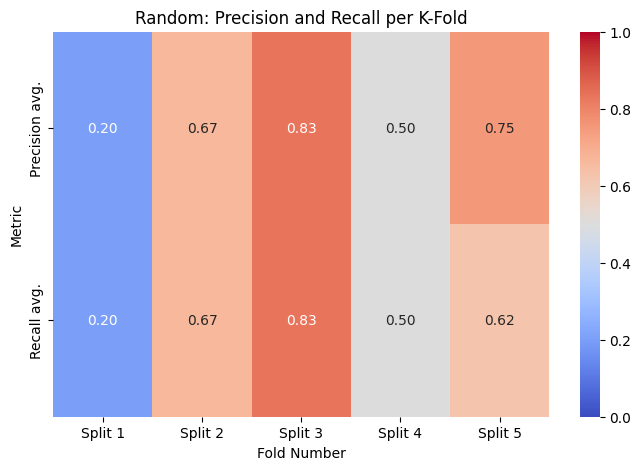

In [ ]:
heatmap_data_random_filtering = pd.DataFrame({
    'Precision avg.': random_precision_list,
    'Recall avg.': random_recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_random_filtering.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Random: Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

In [ ]:
kf = KFold(n_splits=5)
algo = SVD()

k_number = 1
precision_list = []
recall_list = []
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=5)

    # Precision and recall can then be averaged over all users
    print('\nK fold split '+str(k_number)+':')
    print('precision average on all users: '+str(sum(prec for prec in precisions.values()) / len(precisions)))
    precision_list.append(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall average on all users: '+str(sum(rec for rec in recalls.values()) / len(recalls)))
    recall_list.append(sum(rec for rec in recalls.values()) / len(recalls))
    k_number += 1


K fold split 1:
precision average on all users: 0.8333333333333334
recall average on all users: 0.8333333333333334

K fold split 2:
precision average on all users: 1.0
recall average on all users: 1.0

K fold split 3:
precision average on all users: 0.8333333333333334
recall average on all users: 0.8333333333333334

K fold split 4:
precision average on all users: 1.0
recall average on all users: 1.0

K fold split 5:
precision average on all users: 0.8
recall average on all users: 0.8


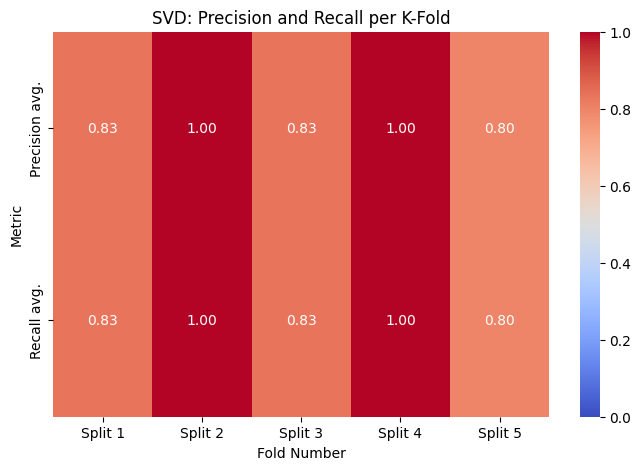

In [ ]:
heatmap_data = pd.DataFrame({
    'Precision avg.': precision_list,
    'Recall avg.': recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('SVD: Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

In [ ]:
kf = KFold(n_splits=5)
algo = KNNBasic()

k_number = 1
precision_list = []
recall_list = []
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=5)

    # Precision and recall can then be averaged over all users
    print('\nK fold split '+str(k_number)+':')
    print('precision average on all users: '+str(sum(prec for prec in precisions.values()) / len(precisions)))
    precision_list.append(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall average on all users: '+str(sum(rec for rec in recalls.values()) / len(recalls)))
    recall_list.append(sum(rec for rec in recalls.values()) / len(recalls))
    k_number += 1

Computing the msd similarity matrix...
Done computing similarity matrix.

K fold split 1:
precision average on all users: 0.8333333333333334
recall average on all users: 0.8333333333333334
Computing the msd similarity matrix...
Done computing similarity matrix.

K fold split 2:
precision average on all users: 0.6666666666666666
recall average on all users: 0.6666666666666666
Computing the msd similarity matrix...
Done computing similarity matrix.

K fold split 3:
precision average on all users: 0.9
recall average on all users: 1.0
Computing the msd similarity matrix...
Done computing similarity matrix.

K fold split 4:
precision average on all users: 1.0
recall average on all users: 1.0
Computing the msd similarity matrix...
Done computing similarity matrix.

K fold split 5:
precision average on all users: 1.0
recall average on all users: 1.0


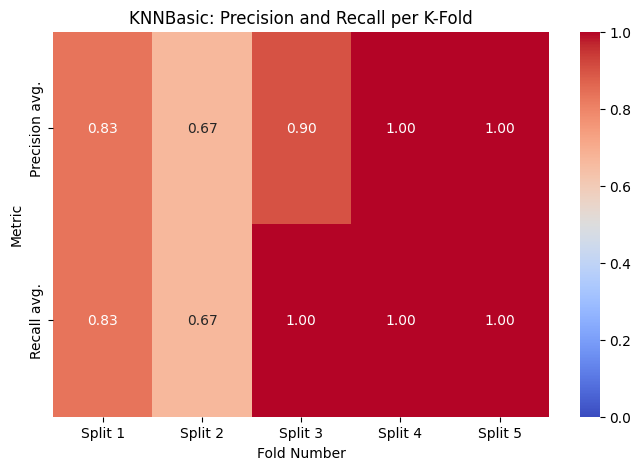

In [ ]:
heatmap_data = pd.DataFrame({
    'Precision avg.': precision_list,
    'Recall avg.': recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('KNNBasic: Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

In [ ]:
kf = KFold(n_splits=5)
algo = CoClustering()

k_number = 1
precision_list = []
recall_list = []
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=5)

    # Precision and recall can then be averaged over all users
    print('\nK fold split '+str(k_number)+':')
    print('precision average on all users: '+str(sum(prec for prec in precisions.values()) / len(precisions)))
    precision_list.append(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall average on all users: '+str(sum(rec for rec in recalls.values()) / len(recalls)))
    recall_list.append(sum(rec for rec in recalls.values()) / len(recalls))
    k_number += 1


K fold split 1:
precision average on all users: 1.0
recall average on all users: 0.9

K fold split 2:
precision average on all users: 0.8333333333333334
recall average on all users: 0.8333333333333334

K fold split 3:
precision average on all users: 0.6666666666666666
recall average on all users: 0.6666666666666666

K fold split 4:
precision average on all users: 1.0
recall average on all users: 1.0

K fold split 5:
precision average on all users: 0.8
recall average on all users: 0.8


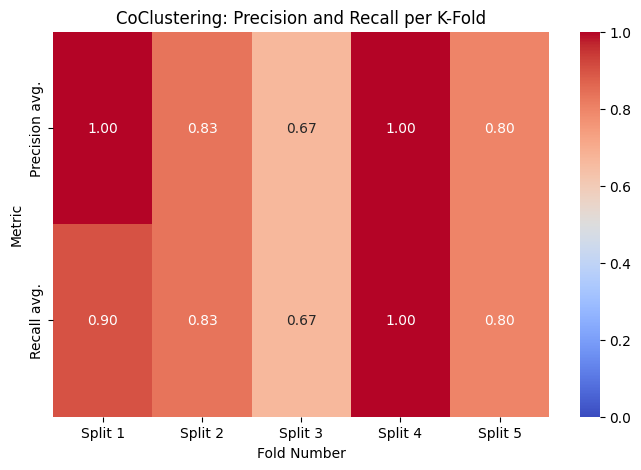

In [ ]:
heatmap_data = pd.DataFrame({
    'Precision avg.': precision_list,
    'Recall avg.': recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('CoClustering: Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

In [ ]:
np.random.seed(0)
# split data into Kf_# folds
kf_5 = KFold(n_splits=5, random_state= 0 )


# Helpful function for better visualization
def algo_to_table(algo, kf_n):
  table_n = []

  start = time.time()

  # cross validate on 5  folds on two evaluation metrics
  result_n= cross_validate(algo(), data, ['rmse','mae'],kf_n)


  cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))

  mean_rmse = '{:.3f}'.format(np.mean(result_n['test_rmse']))

  mean_mae = '{:.3f}'.format(np.mean(result_n['test_mae']))

  line = [str(algo.__name__), mean_rmse, mean_mae,cv_time]

  table_n.append(line)
  return table_n

In [ ]:
KNN_Results = algo_to_table(KNNBasic, kf_5)

table_header = [str('Algorithm'),'RMSE','MAE','Time']
print(' \n \t -------------------- The result for K = 5 --------------------------- \t \n')
print(tabulate(KNN_Results, table_header, tablefmt="pipe"))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
 
 	 -------------------- The result for K = 5 --------------------------- 	 

| Algorithm   |   RMSE |   MAE | Time    |
|:------------|-------:|------:|:--------|
| KNNBasic    |  3.273 | 2.992 | 0:00:00 |


In [ ]:
SVD_Results = algo_to_table(SVD, kf_5)

table_header = [str('Algorithm'),'RMSE','MAE','Time']
print(' \n \t -------------------- The result for K = 5 --------------------------- \t \n')
print(tabulate(SVD_Results, table_header, tablefmt="pipe"))

 
 	 -------------------- The result for K = 5 --------------------------- 	 

| Algorithm   |   RMSE |   MAE | Time    |
|:------------|-------:|------:|:--------|
| SVD         |  3.273 | 2.992 | 0:00:00 |


In [ ]:
CoClustering_Results = algo_to_table(CoClustering, kf_5)

table_header = [str('Algorithm'),'RMSE','MAE','Time']
print(' \n \t -------------------- The result for K = 5 --------------------------- \t \n')
print(tabulate(CoClustering_Results, table_header, tablefmt="pipe"))

 
 	 -------------------- The result for K = 5 --------------------------- 	 

| Algorithm    |   RMSE |   MAE | Time    |
|:-------------|-------:|------:|:--------|
| CoClustering |   3.54 | 3.243 | 0:00:00 |


# Test the models with non-filtered dataset

In [ ]:
#Import the train_test_split function
class_counts = df_capstone['author'].value_counts()
multi_member_classes = class_counts[class_counts > 1].index.tolist()
filtered_df2 = df_capstone[df_capstone['author'].isin(multi_member_classes)]

X_1 = filtered_df2.copy()
y_1 = filtered_df2['author']

# Now, you should be able to stratify without encountering the error
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_1, y_1, test_size=0.4, stratify=y_1, random_state=42
)

In [ ]:
authors_1 = df_capstone['author'].unique()
airlines_1 = df_capstone['airline'].unique()

id_authors_1 = {author: id for id, author in enumerate(authors_1)}
id_airlines_1 = {airline: id for id, airline in enumerate(airlines_1)}

id_to_authors_1 = {id: author for author, id in id_authors_1.items()}
id_to_airlines_1 = {id: airline for airline, id in id_airlines_1.items()}

ratings_1 = df_capstone[['airline', 'overall', 'author']]
ratings_mean_1 = ratings_1.groupby(['airline', 'author'], as_index = False).mean()
ratings_mean_1.head()

ratings_id_1 = ratings_mean_1.copy()
ratings_id_1['airline'] = ratings_mean_1['airline'].map(id_airlines)
ratings_id_1['author'] = ratings_mean_1['author'].map(id_authors)

In [ ]:
data = Dataset.load_from_df(ratings_id[['author', 'airline', 'overall']], reader)
svd = SVD()
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
#Import the required classes and methods from the surprise library
from surprise import *
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate
import time
import datetime


#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader()

#Create the dataset to be used for building the filter
data = Dataset.load_from_df(ratings_id_1[['author', 'airline', 'overall']], reader)
kf = KFold(n_splits=5)
algo = SVD()

k_number = 1
precision_list = []
recall_list = []
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=5)

    # Precision and recall can then be averaged over all users
    print('\nK fold split '+str(k_number)+':')
    print('precision average on all users: '+str(sum(prec for prec in precisions.values()) / len(precisions)))
    precision_list.append(sum(prec for prec in precisions.values()) / len(precisions))
    print('recall average on all users: '+str(sum(rec for rec in recalls.values()) / len(recalls)))
    recall_list.append(sum(rec for rec in recalls.values()) / len(recalls))
    k_number += 1


K fold split 1:
precision average on all users: 0.6121621621621621
recall average on all users: 0.6121621621621621

K fold split 2:
precision average on all users: 0.6509433962264151
recall average on all users: 0.6509433962264151

K fold split 3:
precision average on all users: 0.6064690026954178
recall average on all users: 0.6064690026954178

K fold split 4:
precision average on all users: 0.6437246963562753
recall average on all users: 0.6430499325236168

K fold split 5:
precision average on all users: 0.6293800539083558
recall average on all users: 0.6293800539083558


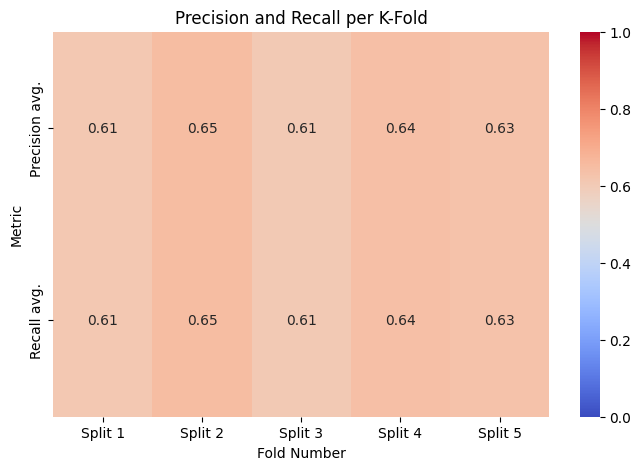

In [ ]:
heatmap_data_SVD = pd.DataFrame({
    'Precision avg.': precision_list,
    'Recall avg.': recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_SVD.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

In [ ]:
kf = KFold(n_splits=5)
random_algo = RandomAlgorithm(rating_scale=(1, 10))

# List to store precision and recall for the random model
k_number = 1

random_precision_list = []
random_recall_list = []

# Evaluate the random model
for trainset, testset in kf.split(data):
    # Train random model (no actual training is done, but this is to simulate the process)
    random_algo.fit(trainset)

    # Test random model
    random_predictions = random_algo.test(testset)
    random_precisions, random_recalls = precision_recall_at_k(random_predictions, k=5, threshold=5)

    # Compute average precision and recall for the random model
    print('\nK fold split '+str(k_number)+':')
    random_precision = sum(prec for prec in random_precisions.values()) / len(random_precisions)
    random_recall = sum(rec for rec in random_recalls.values()) / len(random_recalls)
    print('Random-algorithm precision on all users:',random_precision)
    print('Random-algorithm recall on all users:',random_recall)
    random_precision_list.append(random_precision)
    random_recall_list.append(random_recall)
    k_number += 1


K fold split 1:
Random-algorithm precision on all users: 0.75
Random-algorithm recall on all users: 0.625

K fold split 2:
Random-algorithm precision on all users: 0.6
Random-algorithm recall on all users: 0.6

K fold split 3:
Random-algorithm precision on all users: 0.5
Random-algorithm recall on all users: 0.375

K fold split 4:
Random-algorithm precision on all users: 0.5
Random-algorithm recall on all users: 0.5

K fold split 5:
Random-algorithm precision on all users: 0.6
Random-algorithm recall on all users: 0.6


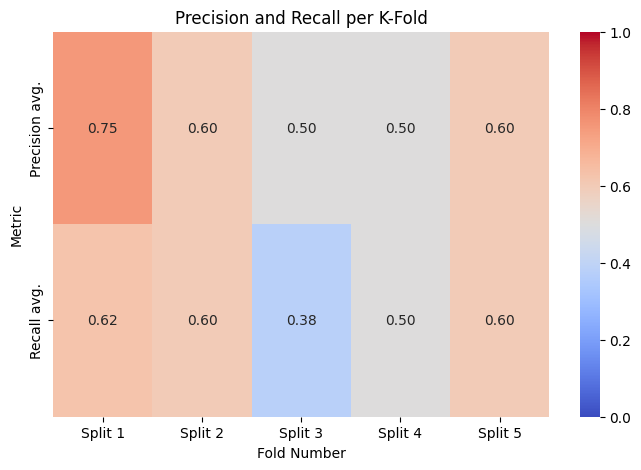

In [ ]:
heatmap_data_r = pd.DataFrame({
    'Precision avg.': random_precision_list,
    'Recall avg.': random_recall_list
}, index=[f'Split {i+1}' for i in range(5)])

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_r.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Precision and Recall per K-Fold')
plt.ylabel('Metric')
plt.xlabel('Fold Number')
plt.show()

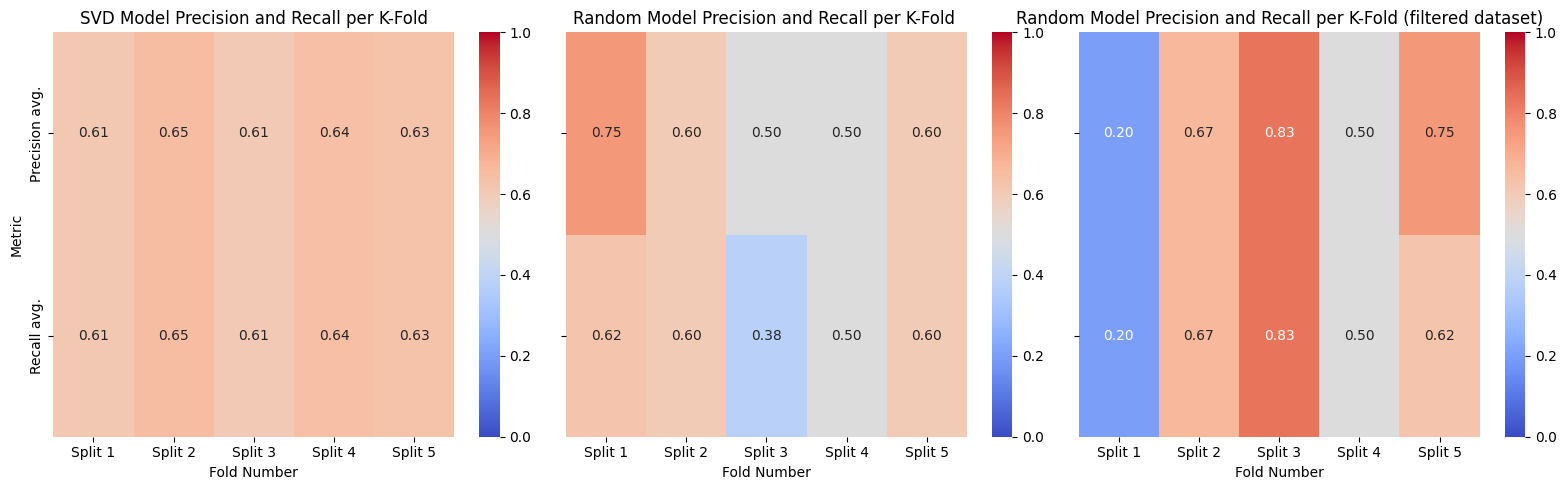

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

sns.heatmap(heatmap_data_SVD.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1, ax=axes[0])
axes[0].set_title('SVD Model Precision and Recall per K-Fold')
axes[0].set_ylabel('Metric')
axes[0].set_xlabel('Fold Number')

# Random model heatmap
sns.heatmap(heatmap_data_r.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('Random Model Precision and Recall per K-Fold ')
axes[1].set_xlabel('Fold Number')

sns.heatmap(heatmap_data_random_filtering.T, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1, ax=axes[2])
axes[2].set_title('Random Model Precision and Recall per K-Fold (filtered dataset)')
axes[2].set_xlabel('Fold Number')

# Display the subplots
plt.tight_layout()
plt.show()

As we can see the preprocessing was crucial to the model. Both precision and recall is way down if we dont use the filtered dataset.

# Test Hybrid

We would've liked to create a Hybrid-model but we simply didn't have time